# Исследование успешности компьютерных игр

Описание данных:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB*.

*ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## План работы

1. Открыть и изучить данные;
2. Подготовить данные;
3. Провести исследовательский анализ данных;
4. Составить портрет пользователя каждого региона;
5. Проверить гипотезы:
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action и Sports разные.
6. Общий вывод

## 1 Изучение данных

In [1]:
# импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt     
import numpy as np
import seaborn as sns

from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [2]:
# загрузим датасет
data = pd.read_csv('games.csv')

In [3]:
# просмотрим названия столбцов и порядок значений в них
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# изучим количество пропусков и тип значений в каждом столбце
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


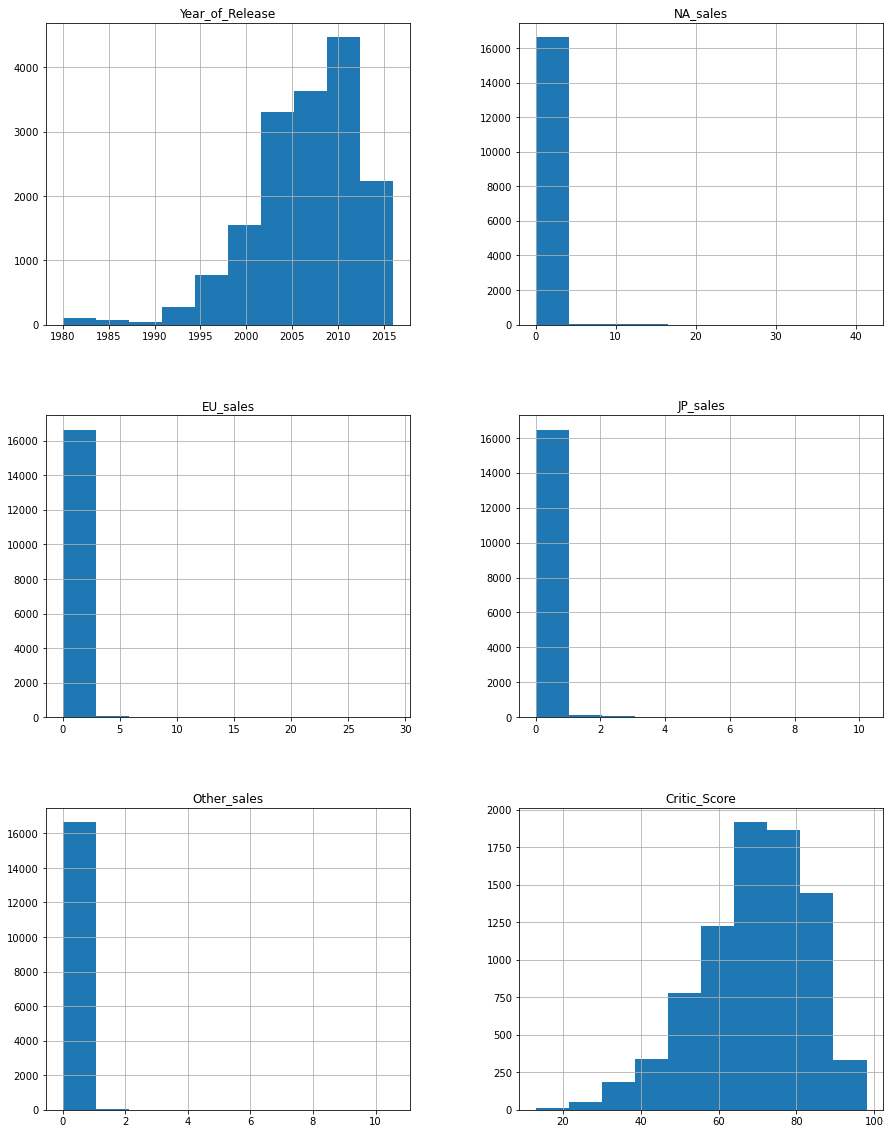

In [5]:
#посмотрим на распределения значений на гистрораммах
data.hist(figsize=(15, 20))
None

По итогу изучения исходных данных можно сделать несколько выводов:
- представленные данных полны и достаточны для исследвания;
- значения в столбцах critic_score и year_of_release распределены нормально;
- столбцы, содержащие данные о количестве проданных копий имеют большие выбросы в большую сторону;
- данные в столбце user_score представлены в неверном виде, поскольку там должны быть численные значения.

## 2 Предобработка данных

In [6]:
#приведем названия колонок к нижнему регистру
data.columns = data.columns.str.lower()

In [7]:
#Посмотрим на количество пропусков в столбцах, выраженных в процентах
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
name,0.0
platform,0.0
year_of_release,1.6
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0
other_sales,0.0
critic_score,51.3
user_score,40.1


In [8]:
#удалим данные с пропусками, где их количество незначительно
data.dropna(subset=['name', 'year_of_release', 'genre'], inplace = True)

В столбцах 'name', 'year_of_release', 'genre' количество данных с пропущенными значениями незначительно, составляет меньше 1%. От этих данных можно избавиться, чтобы в дальнейшем получить более правильное распределение и получить более достоверный прогноз.

Пропуски в данных могут возникнуть последующим причинам:
1. ошибка при ручном вводе;
2. программная ошибка при выгрузке или обработке исходных данных;
3. намерянное оставление пропусков, например, когда нет достаточно информации.

In [9]:
#подробнее изучим значения "tbd" в данных столбца "user_score"
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tbd  - означает, оценка не определена. В данной классификации существует рейтинг RP - «Rating Pending», что означает, что рейтинг будет определен позже. На данном этапе нет достоверных данных о том, что в действительности tbd и RP предполагают одно и то же. Принято решение эти значения заменить на nan, поскольку для данного этапа анализа это, по-сути, одно и то же.

In [10]:
#заменим значения 'tbd' на nan и проверим
data.replace('tbd', np.nan, inplace=True)

In [11]:
#заменим данные в колонке с годом релиза на целочисленные
data['year_of_release'] = data['year_of_release'].astype('int')

#а данные с оценкой пользователей на вещественные
data['user_score'] = data['user_score'].astype('float64')

Значения в столбце 'year_of_release' в исходном датафрейме представленны в виде вещественных значений, что несовсем правильно. Данные представленны в виде значения полного года, поэтому логично заменить тип данных на целочисленный. После обработки столбца 'user_score' можно перевести тип данных из категориального в вещественный, чтобы в дальнейшем с ним можно было выполнять операции для оставления таблиц и диаграмм.

In [12]:
#проверим, как заполнены пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Данные в столбах "critic_score", "user_score", "rating" оставлены с пропусками, поскольку на данном этапе исследования имеется недостаточно данных для их заполнения. Кроме того, замена данных в этих столбцах медианным или средним по какой-то категории или зависимости может привести к рискам получить неверные выводы. Оценка пользователя или критика является субъективной и не может быть спрогнозирована по имеющимся данным, а данные о рейтинге по возрастным ограничениям требуют исследования контента каждой игры, либо поиска этой информации в сторонних источниках. 

In [13]:
#посчитаем суммарные продажи и запишем в отдельный столбец
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

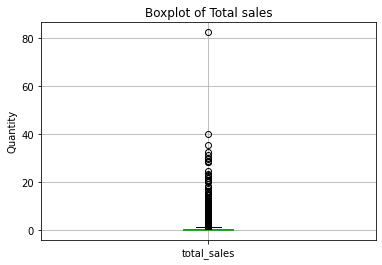

In [14]:
#проверим выбросы в столбце total_sales

data.boxplot(column='total_sales')
plt.title('Boxplot of Total sales')
plt.ylabel('Quantity')
None

In [15]:
#Посмотрим, какой процент строк отсечется, если отбросить выбросы более 20 млн проданных копий
for_cut = len(data[data['total_sales'] > 20])

total = len(data['total_sales'])

for_cut*100/total

0.12162490878131842

Процент продаж стоимостью более 20 млн составляет менее 1% от всех данных. Эти строки можно удалить, чтобы в дальнейшем исследовании получить более равномерное распределение значений.

In [16]:
#фильтруем данные по количеству проданных копий
data = data[data['total_sales'] < 20]

In [17]:
#проверим категориальные данные на наличие дубликатов

print(data['name'].unique())
print()
print(data['platform'].unique())
print()
print(data['rating'].unique())

['Pokemon Diamond/Pokemon Pearl' 'Super Mario Land' 'Super Mario Bros. 3'
 ... 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

['DS' 'GB' 'NES' 'X360' 'PS2' 'GBA' 'PS4' '3DS' 'PS3' 'Wii' 'N64' 'PS'
 'SNES' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

[nan 'M' 'E' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


В столбце 'rating' обнаружены неявные дубликаты. В данном случае, рейтинг 'K-A' и 'E' это одно и то же. Наименование 'K-A'- "Kids to Adults" использовалось ранее, позже его заменили на 'E' - «Everyone».

In [18]:
#заменим значения 'K-A' на 'E' и проверим

data.replace('K-A', 'E', inplace=True)

#заменим значения nan на 'unknown', чтобы эти данные не были отброшены в дальнейшем исследовании
data['rating'] = data['rating'].fillna(value='unknown')

data['rating'].unique()

array(['unknown', 'M', 'E', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Таким образом, исходные данные подготовлены к дальнейшему исследованию. Заменены названия столбцов, удалено незначительное количество строк с пропущенными значениями и большими выбросами в новом стобце 'total_sales'. Кроме того, преобразованы типы данных в тех столбцах, где это было необходимо.  

## 3 Исследовательский анализ данных

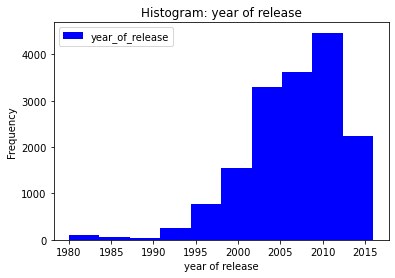

In [19]:
#посмотрим, сколько игр выпускалось в разные годы

data.plot(y='year_of_release', title='Histogram: year of release', kind='hist', bins=10, color='blue')
plt.xlabel('year of release')
None

Похоже, что данные до 2000 года незначительны. Они могут быть менее важными, чем в период роста продаж в следующее десятилетие.

In [20]:
#посмотрим, как менялись продажи по платформам
#отсортируем данные по платформам и выберем 10 с самыми большими продажами
data_grouped = (data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                .sort_values(by='total_sales', ascending=False).head(10))

display(data_grouped)

,total_sales
platform,
PS2,1212.75
X360,939.42
PS3,910.29
PS,727.58
DS,704.96
Wii,638.62
PS4,314.14
GBA,312.88
PSP,289.53


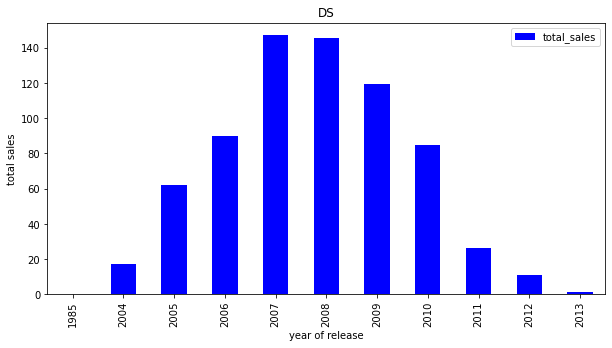

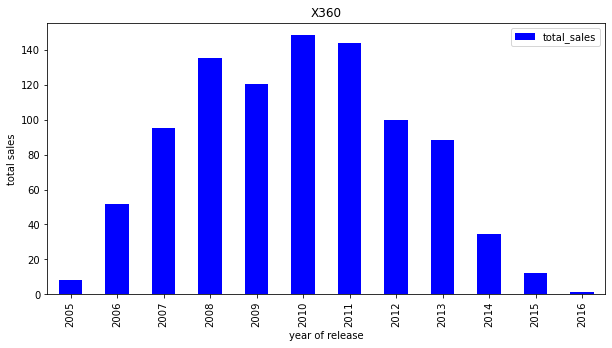

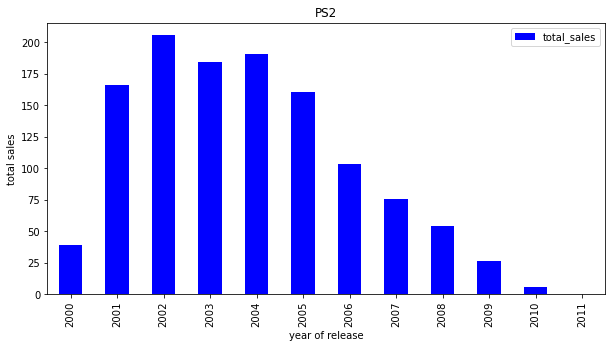

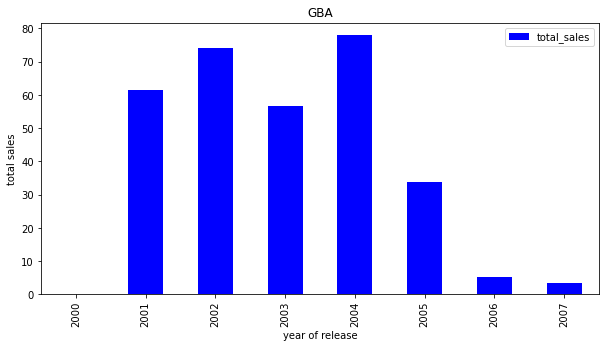

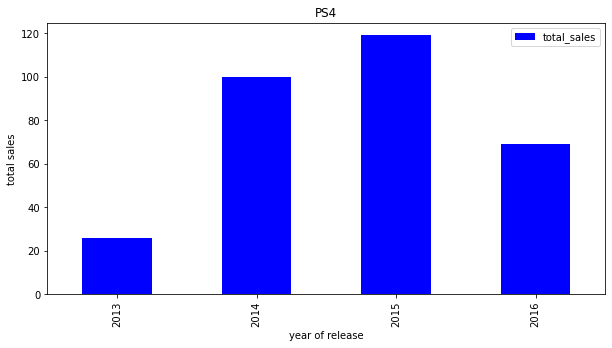

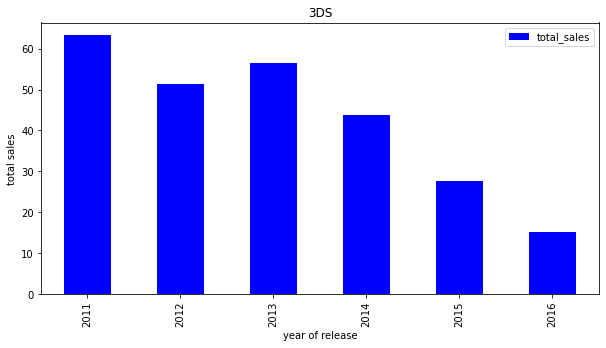

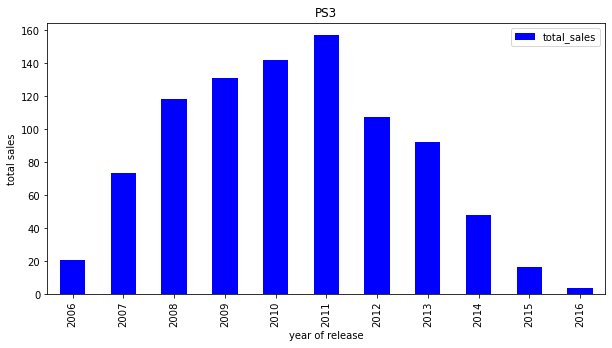

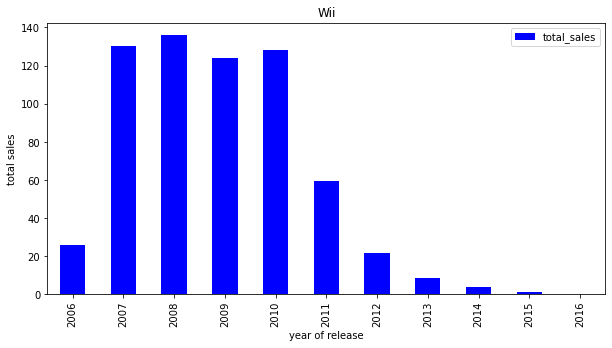

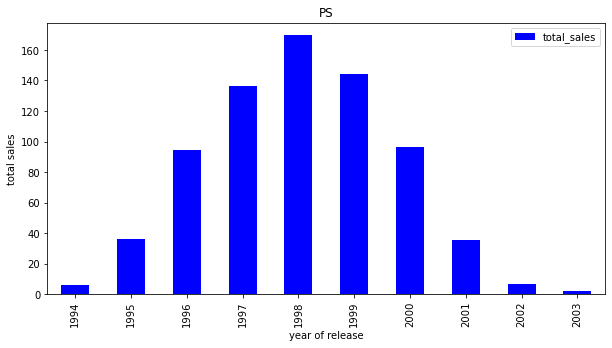

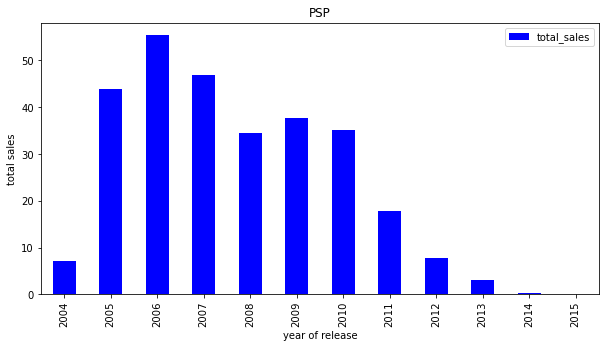

In [21]:
#построим диаграммы для каждой из выбранных платформ по годам
for platf in data.query('platform in @data_grouped.index')['platform'].unique():
    sales_graph = (data[data['platform'] == platf] 
        .pivot_table(index=['year_of_release'], values='total_sales', aggfunc='sum')
        .plot(y='total_sales', title=platf, kind='bar', figsize= (10,5), color='blue')
     )
    plt.ylabel('total sales')
    plt.xlabel('year of release')
    plt.show()

None

Судя по году старта продаж игр для каждой из выбранных платформ, можно сделать вывод, что платформы существуют приблизительно 10 лет. Если не учитывать данные до 2000 года, то характерный срок появления новых платформ 1-3 года, а срок исчезновения старых - 8-10 лет.

In [22]:
#отсеим данные, считая, что актуальный период для пронозирования на 2017 являтеся 2015-2016 годы релиза игр
data_sort = data.query('year_of_release == [2015, 2016]')
data_sort

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Актуальный период для прогноза на 2017 год выбираем с 2015 по 2016. Не смотря на то, что данные за 2016 год могут быть неполными, этот период хорошо описывает общую тендецию и имеет достаточное количество данных за 2015 год. Более ранние данные в дальнейшем не будут рассматриваться.

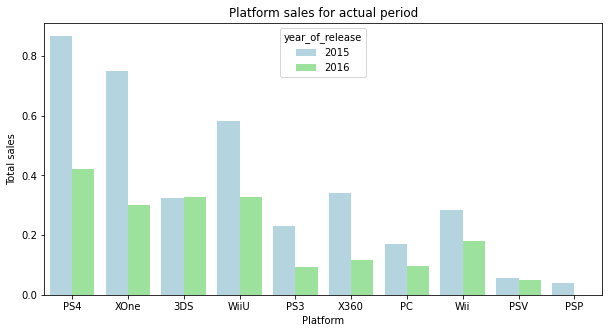

In [23]:
#зададим размер диаграммы
plt.figure(figsize=(10,5))

#построим диаграмму продаж по платформам, с разделением по годам
sales = sns.barplot(x='platform',
            y='total_sales',
            hue='year_of_release',
            data=data_sort,
            ci=None,
            palette=['lightblue', 'lightgreen']
)

sales.set_title('Platform sales for actual period')
sales.set(xlabel='Platform', ylabel='Total sales')
None

За период 2015-2016 год можно определить платформы с самыми низкими продажами - PSP, PSV. Самые высокие продажи - PS4 как за 2015, так и за 2016 период. Платформы PS4, 3DS, WiiU, XOne можно назвать потенциально прибыльными, не смотря на то,что для платформы XOne показатели продаж за 2016 год гораздо ниже 2015. Данные за 2016 год могут быть неполными, поэтому в этом случае берем во внимание данные за 2015 год.

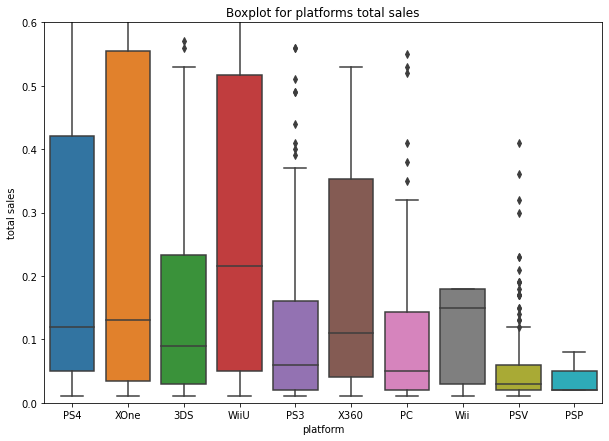

In [24]:
#зададим размер диаграммы
plt.figure(figsize=(10,7))

#построим ящик с усами для выбранных платформ за актуальный период по продажам
sns.boxplot(x='platform', y='total_sales', data=data_sort)
plt.ylim([0, 0.6])
plt.title('Boxplot for platforms total sales')
plt.ylabel('total sales')
plt.xlabel('platform')
None

Исходя из полученных результатов можно сделать вывод, что наибольшие продажи у платформы XOne. По медианному же значению по продажам лидирует WiiU. Кроме того, выбросы и большой разброс значений сильно влияют на показатели продаж, в то время как медианное значение отражает более скромные показатели, что ближе к реальности. Самое низкое количество проданных игр наблюдается на платформе PSP и PSV. Большой разброс значений может быть связан с выходом какой-то очень популярной игры, когда продажи единомоментно резко возрастают от ее поклонников и далее падают по мере потери интереса. 

In [25]:
# напишем функцию для получения графика зависимостей
def dependency_results(platform, valuator, color):
    if valuator == 'user_score':
        valuator_name = 'user'
    else:
        valuator_name = 'critic'
    
    table = (data_sort.query('platform == @platform')
             .pivot_table(index=valuator, values='total_sales')
             .plot(y='total_sales', style='o', color=color, 
                   figsize=(10,7), alpha=0.5))
    plt.gca().set(xlabel=valuator, ylabel='total sales')
    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    plt.title(f'Platforms dependence of sales on {valuator_name} scores {platform}', fontsize=14)
    plt.legend(fontsize=12)  
    
    return table

In [26]:
# напишем функцию для вычисления корреляции
def correlation_result(platform, valuator):
    result = (data_sort.query('platform == @platform')[valuator]
       .corr(data_sort.query('platform == @platform')["total_sales"]))

    return result    

Коэффициент корреляции (оценка пользователей): 0.36
Коэффициент корреляции (оценка критиков): 0.32


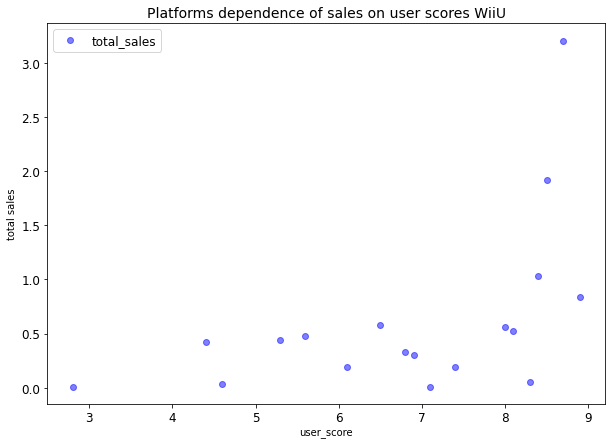

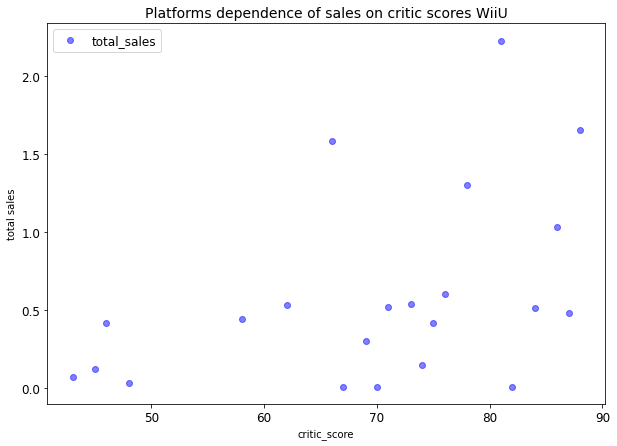

In [27]:
#построим диаграмму зависимсоти продаж от оценки пользователей для платформы WiiU
dependency_results("WiiU", 'user_score', 'blue')

#построим диаграмму зависимсоти продаж от оценки критиков для платформы WiiU
dependency_results("WiiU", 'critic_score', 'blue')

#вычислим коэффициент корреляции
print('Коэффициент корреляции (оценка пользователей):', "%.2f" % correlation_result("WiiU", 'user_score'))
print('Коэффициент корреляции (оценка критиков):', "%.2f" % correlation_result("WiiU", 'critic_score'))

Корреляция продаж от оценки пользователей средняя. Можно сказать, что оценка пользователей влияет на продажи, некоторое увеличение продаж наблюдается при максимальной положительной оценке. Корреляция продаж от оценки критиков средняя. Здесь также наблюдается некоторое увеличение продаж при высокой оценке критиков.

Коэффициент корреляции (оценка пользователей): -0.06
Коэффициент корреляции (оценка критиков): 0.39


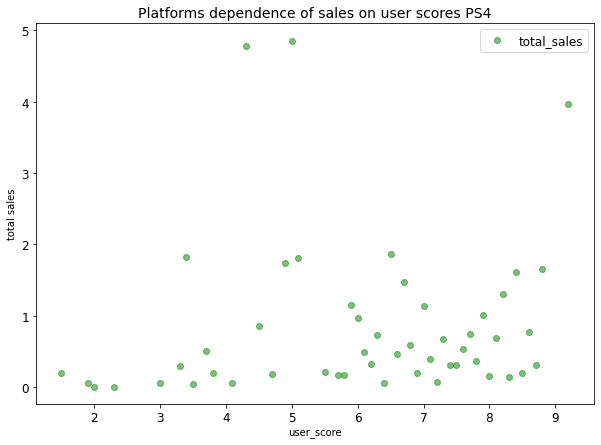

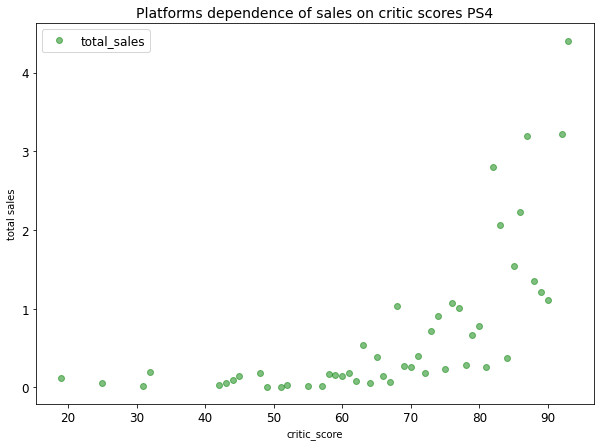

In [28]:
#построим диаграмму зависимсоти продаж от оценки пользователей для платформы PS4
dependency_results("PS4", 'user_score', 'green')

#построим диаграмму зависимсоти продаж от оценки критиков для платформы PS4
dependency_results("PS4", 'critic_score', 'green')

#вычислим коэффициент корреляции
print('Коэффициент корреляции (оценка пользователей):', "%.2f" % correlation_result("PS4", 'user_score')) 
print('Коэффициент корреляции (оценка критиков):', "%.2f" % correlation_result("PS4", 'critic_score'))

Корреляция продаж от оценки критиков для платформы PS4 средняя. Можно сказать, что оценка критиков влияет на продажи, некоторое увеличение продаж наблюдается при максимальной положительной оценке. Корреляция продаж от оценки пользователей близка к 0, здесь зависимости не наблюдается.

Коэффициент корреляции (оценка пользователей): 0.20
Коэффициент корреляции (оценка критиков): 0.18


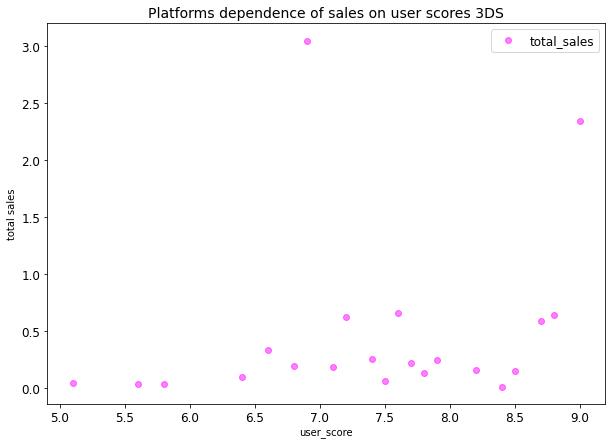

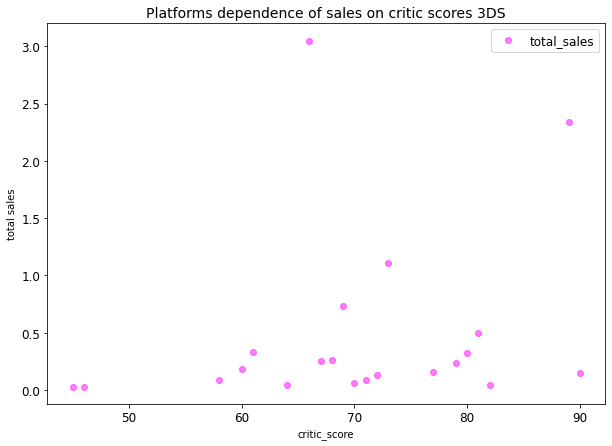

In [29]:
#построим диаграмму зависимсоти продаж от оценки пользователей для платформы 3DS
dependency_results("3DS", 'user_score', 'magenta')

#построим диаграмму зависимсоти продаж от оценки критиков для платформы 3DS
dependency_results("3DS", 'critic_score', 'magenta')

#вычислим коэффициент корреляции
print('Коэффициент корреляции (оценка пользователей):', "%.2f" % correlation_result("3DS", 'user_score')) 
print('Коэффициент корреляции (оценка критиков):', "%.2f" % correlation_result("3DS", 'critic_score'))

Корреляция продаж от оценки пользователей и критиков для платформы 3DS низкая. Можно сказать, что оценки слабо влияют на продажи за актуальный период.

Коэффициент корреляции (оценка пользователей): -0.04
Коэффициент корреляции (оценка критиков): 0.43


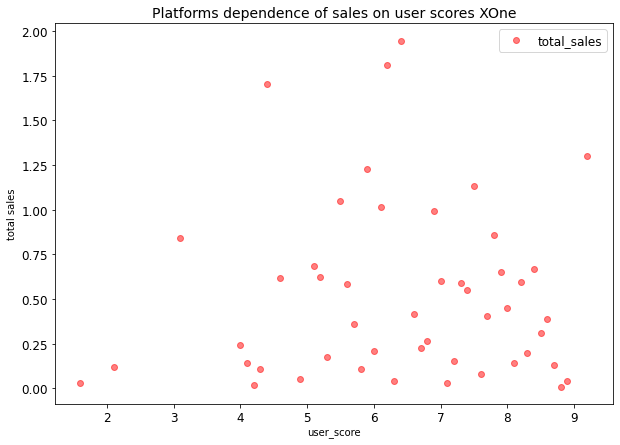

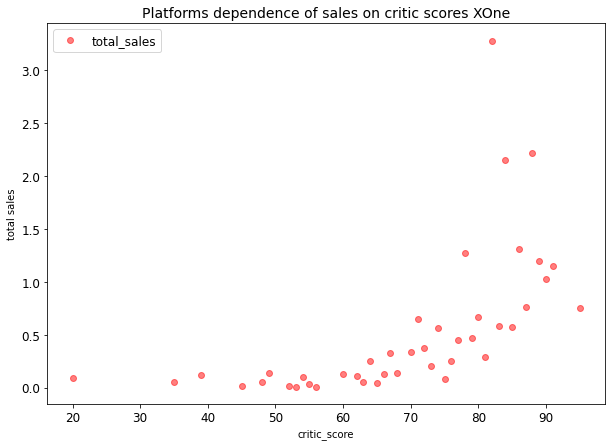

In [30]:
#построим диаграмму зависимсоти продаж от оценки пользователей для платформы XOne
dependency_results("XOne", 'user_score', 'red')

#построим диаграмму зависимсоти продаж от оценки критиков для платформы XOne
dependency_results("XOne", 'critic_score', 'red')

#вычислим коэффициент корреляции
print('Коэффициент корреляции (оценка пользователей):', "%.2f" % correlation_result("XOne", 'user_score')) 
print('Коэффициент корреляции (оценка критиков):', "%.2f" % correlation_result("XOne", 'critic_score'))

Корреляция продаж от оценки критиков для платформы XOne средняя. Можно сказать, что оценка критиков влияет на продажи, некоторое увеличение продаж наблюдается при максимальной положительной оценке. Корреляция продаж от оценки пользователей близка к 0, здесь зависимости не наблюдается.

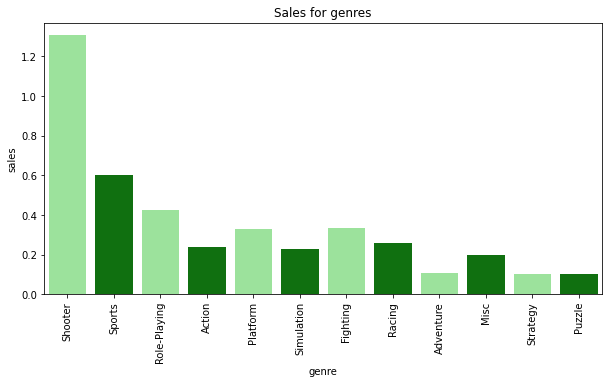

In [31]:
#посмотрим на распределение продаж по игровым жанрам и определеим наиболее прибыльные
plt.figure(figsize=(10,5))

sales = sns.barplot(x='genre',
            y='total_sales',
            data=data_sort,
            ci=None,
            palette=['lightgreen', 'green'])

sales.set_title('Sales for genres')
sales.set(xlabel='genre', ylabel='sales')
plt.xticks(rotation=90)
None

Самый прибыльный жанр по актульному периоду  - Shooter. Жанры с самыми низкими продажами - Adventure, Strategy, Puzzle. Популярность жанра Shooter быть обоснована как выходом в эти годы культовых игр, также может отражать мировые события, направления в кино и соотвествующий этим факторам запрос игроков. 

По данным из открытых источников "Call of Duty: Black Ops 3", вышедшая в 2015 году имела огромный коммерческий успех в Америке. Это могло повлиять на исследуемые данные, поскольку продажи по Северной Америке представляют собой значительную часть.

### 3.1 Портрет пользователя каждого региона

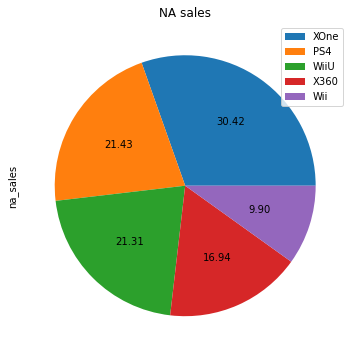

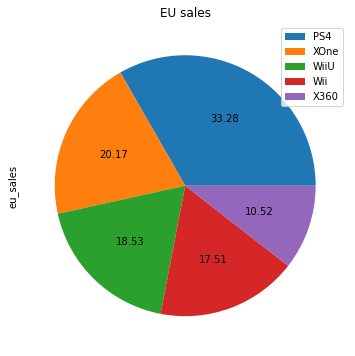

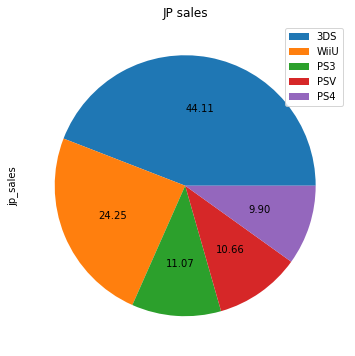

In [32]:
#вычислим долю продаж по региону относительно общих продаж
na_sales_table = (data_sort
    .pivot_table(index='platform', values='na_sales')
    .sort_values(by='na_sales', ascending=False)
)

na_sales_table = na_sales_table[:5]

eu_sales_table= (data_sort
    .pivot_table(index='platform', values='eu_sales')
    .sort_values(by='eu_sales', ascending=False)
)

eu_sales_table = eu_sales_table[:5]

jp_sales_table= (data_sort
    .pivot_table(index='platform', values='jp_sales')
    .sort_values(by='jp_sales', ascending=False)
)

jp_sales_table = jp_sales_table[:5]

#зададим функцию, показывающую долю процентов от общего количества продаж
def autopct(pct): 
    return ('%.2f' % pct)

#выводим получившиеся диаграммы
na_sales_table.plot(y='na_sales', kind='pie', autopct=autopct, labels=None, title='NA sales', figsize=(6, 6))
eu_sales_table.plot(y='eu_sales', kind='pie', autopct=autopct, labels=None, title='EU sales', figsize=(6, 6))
jp_sales_table.plot(y='jp_sales', kind='pie', autopct=autopct, labels=None, title='JP sales', figsize=(6, 6))

None

- В Северной Америке самой популярной является платформа XOne - 30.42% из пяти самых популярных платформ.
- В Европе наибольшую популярность имеет платформа PS4 - 33.28% из пяти самых популярных платформ.
- В Японии самая популярная платформа 3DS - 44.11% продаж из пяти наиболее популярных.

In [33]:
#Определим популярные жанры в различных регионах
def region_tables(region):
    table = (data_sort
             .pivot_table(index='genre', values=region)
             .sort_values(by=region, ascending=False)
             .head())
    
    return table


display(region_tables('na_sales'))
display(region_tables('eu_sales'))
display(region_tables('jp_sales'))

,na_sales
genre,
Shooter,0.594815
Sports,0.245888
Role-Playing,0.150152
Fighting,0.149730
Platform,0.135000


,eu_sales
genre,
Shooter,0.497284
Sports,0.260000
Racing,0.155238
Role-Playing,0.130379
Platform,0.114286


,jp_sales
genre,
Role-Playing,0.101591
Puzzle,0.074286
Simulation,0.058485
Action,0.053480
Platform,0.050714


В Северной Америке и Европе самые популярные жанры - Shooter и Sports. В Японии же Role-Playing. Схожесть предпочтений в Европе и Северной Америке может быть обоснована схожестью культур и общим влиянием друг на друга. Япония, как и другие азиатские страны, развиваются обособлено и формируют, таким образом, собвственные предпочтения и культурные специфики. 

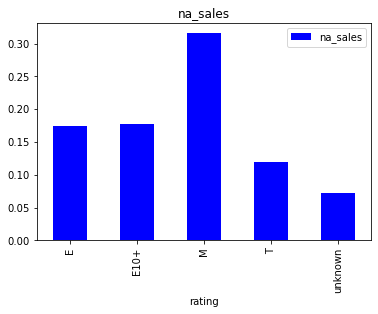

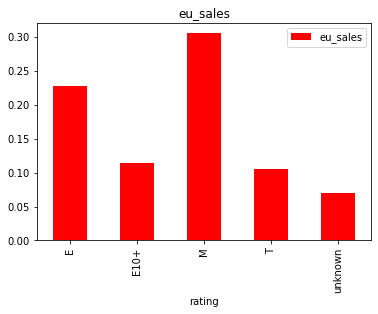

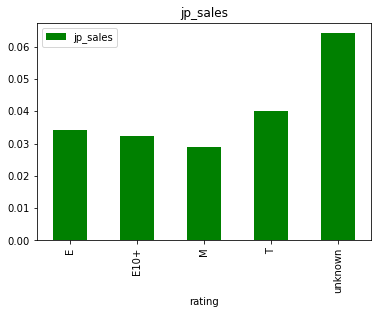

In [34]:
#Определим как влияет рейтинг на продажи в различных регионах
def rating_daigramm(region, color):
    graph = (data_sort
             .pivot_table(index='rating', values=region)
             .plot(y=region, kind='bar', color=color, title=region))

rating_daigramm('na_sales', 'blue')
rating_daigramm('eu_sales', 'red')
rating_daigramm('jp_sales', 'green')

Ретинг игры определенно имеет влияние на продажи платформы. Так, в Северной Америке и Европе наибльшие продажи имеют игры с категорией "М" («Mature») — «Для взрослых», имеющие ограничение по возрасту от 17 лет. 

В Японии рейтинг выглядит иначе. Большая часть игр не внесена в систему ESRB. Возможно, для реализации игр на территории Японии не обязательно быть частью системы рейтингов ESRB, либо они пользуются собственной системой рейтингов.
В остальном, судя по существующим данным в Японии наибольшей популярностью пользуются игры «T» («Teen») — «Подросткам», для категории пользователей от 13 лет. Но этим данным нельзя доверять. 

## 4 Проверка гипотез

Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Рейтинг (user_score) пользователей платформ "Xbox One" = рейтинг (user_score) пользователей платформ "PC"
H_a: Рейтинг (user_score) пользователей платформ "Xbox One" ≠ рейтинг (user_score) пользователей платформ "PC"

alpha = 0.05
```

In [35]:
#для проверки гипотез также будем изучать данные за актуальный период
#здесь же отбросим nan значения
pc_user_score = data_sort[data_sort['platform'] =='PC']['user_score'].dropna()
xone_user_score = data_sort[data_sort['platform'] =='XOne']['user_score'].dropna()

results = st.ttest_ind(
    pc_user_score, 
    xone_user_score,
    equal_var = False)

# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    

0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

```
H_0: Рейтинг (user_score) пользователей жанров Action = рейтинг (user_score) пользователей жанров Sports
H_a: Рейтинг (user_score) пользователей жанров Action ≠ рейтинг (user_score) пользователей жанров Sports

alpha = 0.05
```


In [36]:
#для проверки гипотез также будем изучать данные за актуальный период
#здесь же отбросим nan значения
action_user_score = data_sort[data_sort['genre'] =='Action']['user_score'].dropna()
sports_user_score = data_sort[data_sort['genre'] =='Sports']['user_score'].dropna()

results = st.ttest_ind(
    action_user_score, 
    sports_user_score,
    equal_var = False)

# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

5.97163549920592e-10
Отвергаем нулевую гипотезу


Нулевые гипотезы формулируются как утверждения, полученные в качестве исходных данных к проверке. Альтенативные же гипотезы формулируются как обратные по смыслу. 

Для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам хорошо подходит t-test (t-критерий Стьюдента). Для параметра alpha, предназначенного для решения о принятии или отвержении нулевой гипотезы выбрано общепринятое значение 5%. 

Таким образом, гипотезу "cредние пользовательские рейтинги платформ Xbox One и PC одинаковые" не получилось отвергнуть. Это значит, что существует значительная вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна. 

Гипотеза о том, что cредние пользовательские рейтинги жанров Action и Sports одинаковы - отвергнута.

## 5 Общий вывод

В ходе проведения исследования исторических данные о продажах игр с целью выявить определяющие успешность игры закономерности были выполнены следующие этапы:
- проведен исследовательский анализ данных и получены следующие выводы:
   - данные до 2000 года незначительны по количеству;
   - актульным периодом для прогноза на 2017 год является 2015-2016 года;
   - лидирущая по продажам платформа - XOne, по медианным значениям продаж - WiiU. Платформы PS4, XOne, WiiU и 3DS можно назвать потенциально прибыльными;
   - внутри одной популярной платформы "WiiU" отзывы критиков и пользователей коррелируют с показателями продаж с значениями 0.3635 и 0.3170 соотвественно;
   - корреляция пользовательских оценок и количества продаж для нескольких потенциально прибыльных платформ имеют низкую зависимость, либо стремятся к нулю, также продажи имеют среднюю зависимость от оценки критиков;
- составлен портрет среднего пользователя по регионам:
   - Типичный игрок Северной Америки предпочитает платформу XOne, жанр Shooter и игры с рейтиногом "M" (возрастное ограничение 17+);
   - Типичный игрок Европы предпочитает платформу PS4, жанр Shooter и игры с рейтиногом "M" (возрастное ограничение 17+);
   - Типичный игрок Японии предпочитает платформу 3DS, жанр Role-Playing. Предпочитаемый рейтинг игры неоднозначен по имеющимся данным;
- проверены следующие гипотезы по t-критерию Стьюдента и получены результаты:
   - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые - нулевая гипотеза не отвергнута;
   - cредние пользовательские рейтинги жанров Action и Sports одинаковые - нулевая гипотеза отвергнута.

Делая прогноз на 2017 год можно предположить, что популярными платформами будут PS4 и XOne, а жанр Shooter с рейтингом M. Кроме того, рекомендуется делать упор на Американский и Европейский рынок, поскольку их аудитория имеет большую численость и схожие предпочтения.
